#  Spatial Cluster Analysis for Food Delivery Base Optimization





In [15]:
pip install osmnx


Note: you may need to restart the kernel to use updated packages.


C:\Users\Mudda\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\Mudda\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\Mudda\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


## Part1: Data Preparation



In [16]:

import osmnx as ox
import geopandas as gpd

tags = {"amenity": "restaurant"}
city = "Manchester, UK"

restaurants =ox.features.features_from_place(city, tags)


In [17]:
restaurants.head()

addr:city addr:country addr:housenumber addr:place  \
element_type osmid                                                            
node         27024694   Manchester           GB          844-846   Didsbury   
             28889316   Manchester           GB              NaN        NaN   
             31257652   Manchester          NaN              NaN        NaN   
             249083228  Manchester          NaN               57        NaN   
             249231445  Manchester           GB              812        NaN   

                       addr:postcode         addr:street     amenity  \
element_type osmid                                                     
node         27024694        M20 2RN       Wilmslow Road  restaurant   
             28889316        M21 7QS      Derwent Avenue  restaurant   
             31257652        M21 7SP  Mauldeth Road West  restaurant   
             249083228       M15 6PQ   Booth Street West  restaurant   
             249231445       M20 5WY            Kingsway  restaurant   

                                   contact:website  cuisine drive_in  ...  \
element_type osmid                                                    ...   
node         27024694   http://oliveandvine.co.uk/    greek       no  ...   
             28889316                          NaN  british      NaN  ...   
             31257652                          NaN   indian      NaN  ...   
             249083228                         NaN  chinese      NaN  ...   
             249231445                         NaN   indian      NaN  ...   

                       nohousenumber nodes building building:levels  \
element_type osmid                                                    
node         27024694            NaN   NaN      NaN             NaN   
             28889316            NaN   NaN      NaN             NaN   
             31257652            NaN   NaN      NaN             NaN   
             249083228           NaN   NaN      NaN             NaN   
             249231445           NaN   NaN      NaN             NaN   

                       addr:interpolation building:part fixme roof:levels  \
element_type osmid                                                          
node         27024694                 NaN           NaN   NaN         NaN   
             28889316                 NaN           NaN   NaN         NaN   
             31257652                 NaN           NaN   NaN         NaN   
             249083228                NaN           NaN   NaN         NaN   
             249231445                NaN           NaN   NaN         NaN   

                       roof:shape building:use  
element_type osmid                              
node         27024694         NaN          NaN  
             28889316         NaN          NaN  
             31257652         NaN          NaN  
             249083228        NaN          NaN  
             249231445        NaN          NaN  

[5 rows x 117 columns]

### Step 2: Data Cleaning



In [18]:
restaurants_cleaned = restaurants[['cuisine', 'geometry']]

restaurants_cleaned = restaurants_cleaned[restaurants_cleaned['geometry'].geom_type == 'Point']

restaurants_cleaned.dropna(subset=['cuisine', 'geometry'], inplace=True)

print(restaurants_cleaned.head())


                        cuisine                   geometry
element_type osmid                                        
node         27024694     greek  POINT (-2.23097 53.41074)
             28889316   british  POINT (-2.25743 53.42548)
             31257652    indian  POINT (-2.26474 53.43465)
             249083228  chinese  POINT (-2.23915 53.46715)
             249231445   indian  POINT (-2.22079 53.40890)


In [19]:
restaurants_cleaned.head(3)

cuisine                   geometry
element_type osmid                                       
node         27024694    greek  POINT (-2.23097 53.41074)
             28889316  british  POINT (-2.25743 53.42548)
             31257652   indian  POINT (-2.26474 53.43465)

## Step 3: Data Preparation


In [20]:
restaurants_cleaned['latitude'] = restaurants_cleaned['geometry'].y
restaurants_cleaned['longitude'] = restaurants_cleaned['geometry'].x

restaurants_cleaned.drop(columns=['geometry'], inplace=True)

print(restaurants_cleaned.head())


                        cuisine   latitude  longitude
element_type osmid                                   
node         27024694     greek  53.410741  -2.230970
             28889316   british  53.425482  -2.257432
             31257652    indian  53.434652  -2.264743
             249083228  chinese  53.467145  -2.239146
             249231445   indian  53.408895  -2.220793


In [21]:
restaurants_cleaned.head(3)

cuisine   latitude  longitude
element_type osmid                                  
node         27024694    greek  53.410741  -2.230970
             28889316  british  53.425482  -2.257432
             31257652   indian  53.434652  -2.264743

## Perform K-Means Clustering

In [22]:
from sklearn.cluster import KMeans


n_clusters = 5  
init_method = 'k-means++'  
max_iter = 300  
n_init = 10  
random_state = 42  
kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
kmeans.fit(restaurants_cleaned[['latitude', 'longitude']])


centroids = kmeans.cluster_centers_


print("Cluster Centers:")
print(centroids)


Cluster Centers:
[[53.45771661 -2.19295806]
 [53.48012532 -2.24184041]
 [53.43933094 -2.27517084]
 [53.41182228 -2.24200845]
 [53.45336083 -2.22622709]]


In [23]:
!pip install matplotlib scikit-learn


C:\Users\Mudda\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Users\Mudda\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Users\Mudda\AppData\Roaming\Python\Python312\site-packages\IPython\utils\_process_win32.py:124: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


## Determining the Optimal Number of Clusters for K-Means clustering


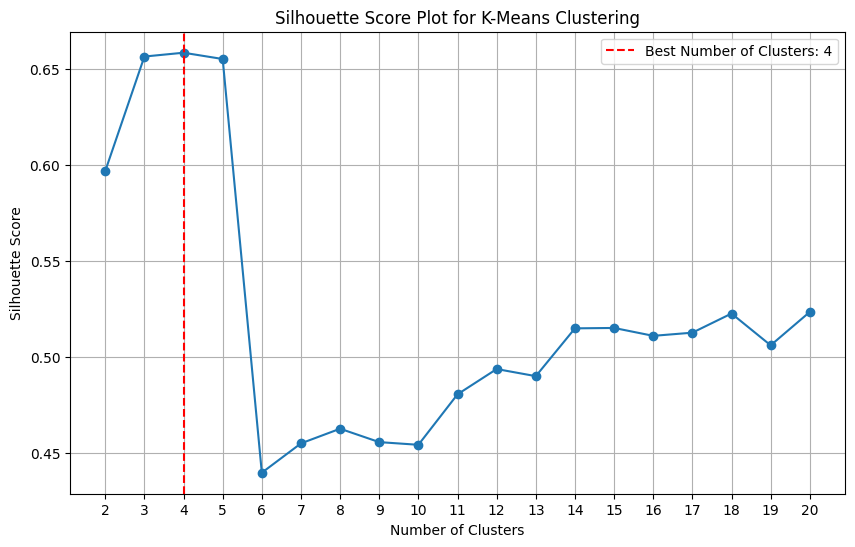

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

n_clusters_range = range(2, 21)  
silhouette_scores = []


for n_clusters in n_clusters_range:
    
    kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
    
    
    cluster_labels = kmeans.fit_predict(restaurants_cleaned[['latitude', 'longitude']])
    
    
    silhouette_avg = silhouette_score(restaurants_cleaned[['latitude', 'longitude']], cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot for K-Means Clustering')
plt.xticks(n_clusters_range)
plt.grid(True)


best_n_clusters = n_clusters_range[silhouette_scores.index(max(silhouette_scores))]
plt.axvline(x=best_n_clusters, color='r', linestyle='--', label=f'Best Number of Clusters: {best_n_clusters}')
plt.legend()


plt.show()


## Performing K-Means Clustering and Visualizing Results


c:\Users\Mudda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mudda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mudda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Mudda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

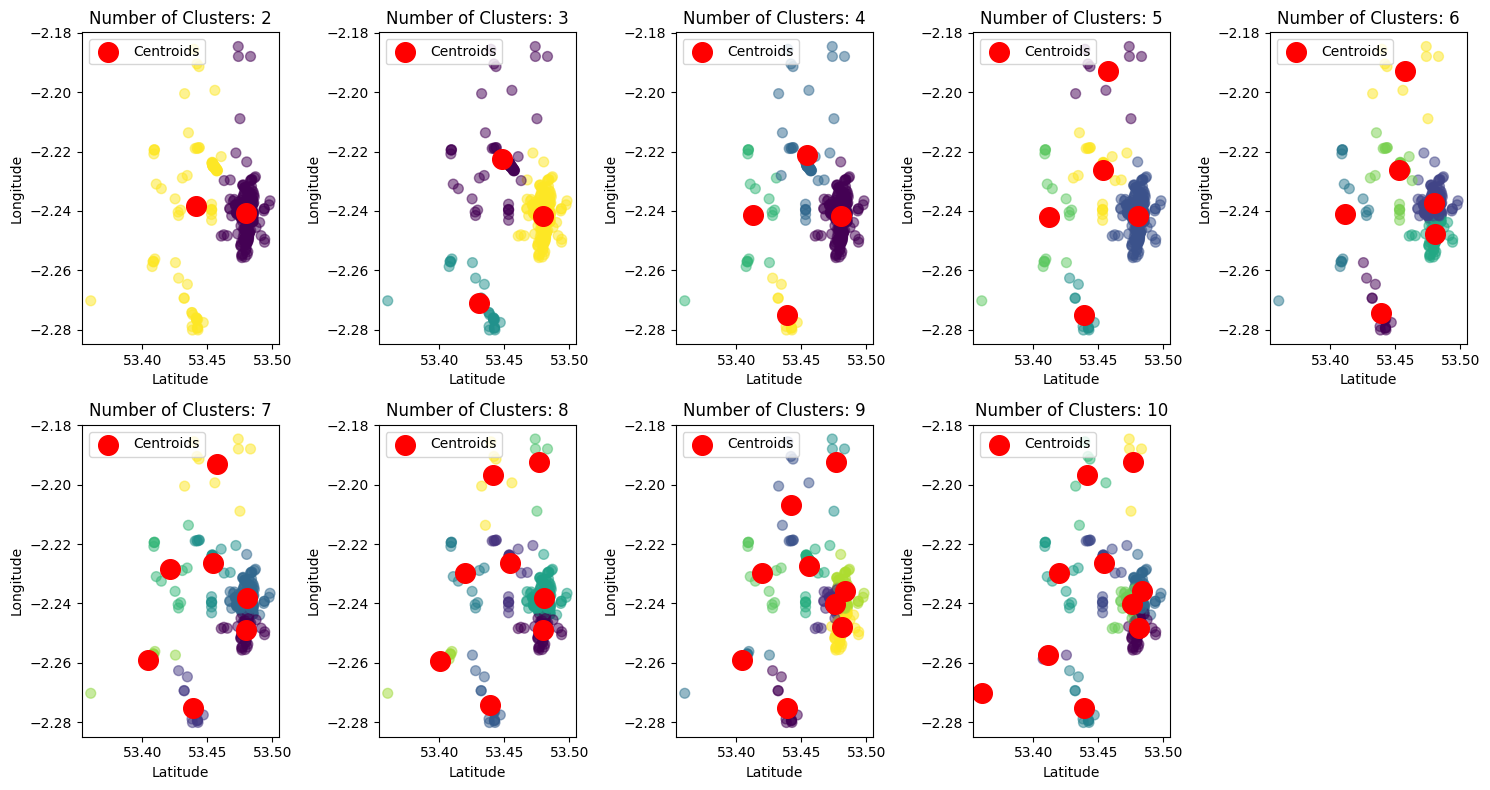

In [25]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Define the range of cluster numbers
n_clusters_range = range(2, 11)  # Adjust the range as needed

# Initialize the plot
plt.figure(figsize=(15, 8))

# Iterate over each number of clusters
for i, n_clusters in enumerate(n_clusters_range, 1):
    # Initialize and fit KMeans clustering algorithm with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(restaurants_cleaned[['latitude', 'longitude']])  # Use latitude and longitude data

    # Plot data points with assigned cluster labels using different colors
    plt.subplot(2, 5, i)  # Create subplots for each number of clusters
    plt.scatter(restaurants_cleaned['latitude'], restaurants_cleaned['longitude'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
    
    # Plot cluster centers (centroids) as red dots
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='o', s=200, label='Centroids')
    
    # Set plot title and labels
    plt.title(f'Number of Clusters: {n_clusters}')
    plt.xlabel('Latitude')
    plt.ylabel('Longitude')
    plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


##  Visualizing Results on Folium Map


In [26]:
import folium

optimal_n_clusters = 5

kmeans = KMeans(n_clusters=optimal_n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=random_state)
cluster_labels = kmeans.fit_predict(restaurants_cleaned[['latitude', 'longitude']])
centroids = kmeans.cluster_centers_

restaurants_cleaned['cluster_label_kmeans'] = cluster_labels

restaurants_cleaned['cluster_centroids_kmeans'] = [centroids[label] for label in cluster_labels]

map_center = [restaurants_cleaned['latitude'].mean(), restaurants_cleaned['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)


for index, row in restaurants_cleaned.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color=f'#{row["cluster_label_kmeans"]+1}0',
                        fill=True,
                        fill_color=f'#{row["cluster_label_kmeans"]+1}0',
                        fill_opacity=0.7).add_to(mymap)


for idx, centroid in enumerate(centroids):
    folium.Marker(location=centroid, 
                  icon=folium.Icon(color='red'),
                  popup=f'Cluster {idx+1} centroid').add_to(mymap)

mymap.save('map.html')
mymap


##  Perform DBSCAN Clustering

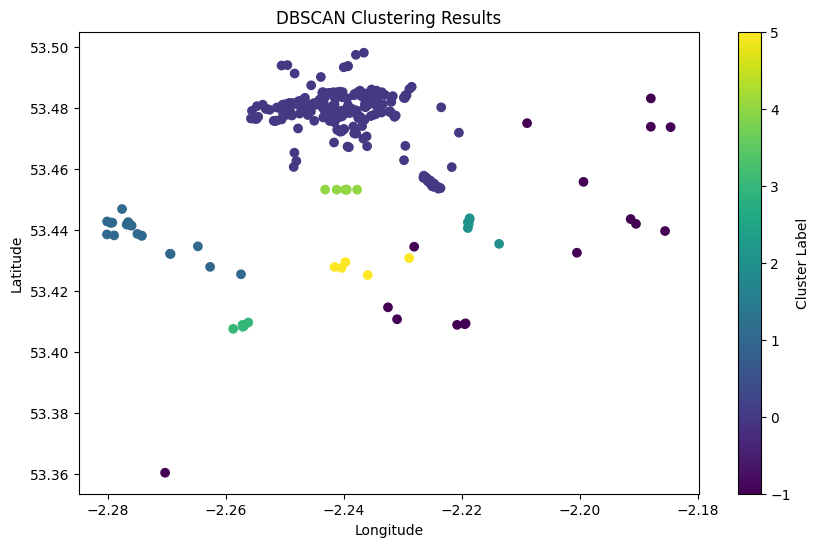

In [27]:
from sklearn.cluster import DBSCAN

eps = 0.01  
min_samples = 5  

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(restaurants_cleaned[['latitude', 'longitude']])

plt.figure(figsize=(10, 6))
plt.scatter(restaurants_cleaned['longitude'], restaurants_cleaned['latitude'], c=cluster_labels, cmap='viridis')
plt.title('DBSCAN Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster Label')
plt.show()


In [28]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

eps_range = np.linspace(0.001, 0.01, 10)
min_samples_range = range(2, 5)



best_score = -1
optimal_eps = None
optimal_min_samples = None
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(restaurants_cleaned[['latitude', 'longitude']])
        if len(np.unique(cluster_labels)) > 1:  # Ensure there's more than one cluster
            silhouette_avg = silhouette_score(restaurants_cleaned[['latitude', 'longitude']], cluster_labels)
            if silhouette_avg > best_score:
                best_score = silhouette_avg
                optimal_eps = eps
                optimal_min_samples = min_samples


print("Optimal Epsilon:", optimal_eps)
print("Optimal Minimum Samples:", optimal_min_samples)
print("Best Silhouette Score:", best_score)


if optimal_eps is not None and optimal_min_samples is not None:
    dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
    cluster_labels = dbscan.fit_predict(restaurants_cleaned[['latitude', 'longitude']])

    
    cluster_centers = []
    for label in np.unique(cluster_labels):
        if label != -1:  # Ignore noise points
            cluster_center = restaurants_cleaned[cluster_labels == label][['latitude', 'longitude']].mean()
            cluster_centers.append(cluster_center)

    print("Number of Clusters:", len(cluster_centers))
    
    base_locations = cluster_centers
    print("Base Locations:")
    for i, location in enumerate(base_locations):
        print(f"Base {i+1}: Latitude {location['latitude']}, Longitude {location['longitude']}")
else:
    print("Unable to find optimal parameters for DBSCAN clustering.")


Optimal Epsilon: 0.007
Optimal Minimum Samples: 4
Best Silhouette Score: 0.5941874349559124
Number of Clusters: 8
Base Locations:
Base 1: Latitude 53.48030339590909, Longitude -2.2416964463636364
Base 2: Latitude 53.40915975, Longitude -2.2197756
Base 3: Latitude 53.44123085, Longitude -2.27732310625
Base 4: Latitude 53.44246628, Longitude -2.2188225
Base 5: Latitude 53.427535199999994, Longitude -2.23940415
Base 6: Latitude 53.45576406764707, Longitude -2.225163405882353
Base 7: Latitude 53.40858524, Longitude -2.25724182
Base 8: Latitude 53.453237666666666, Longitude -2.2401618500000002


## Visualization of Silhouette scores for DBSCAN

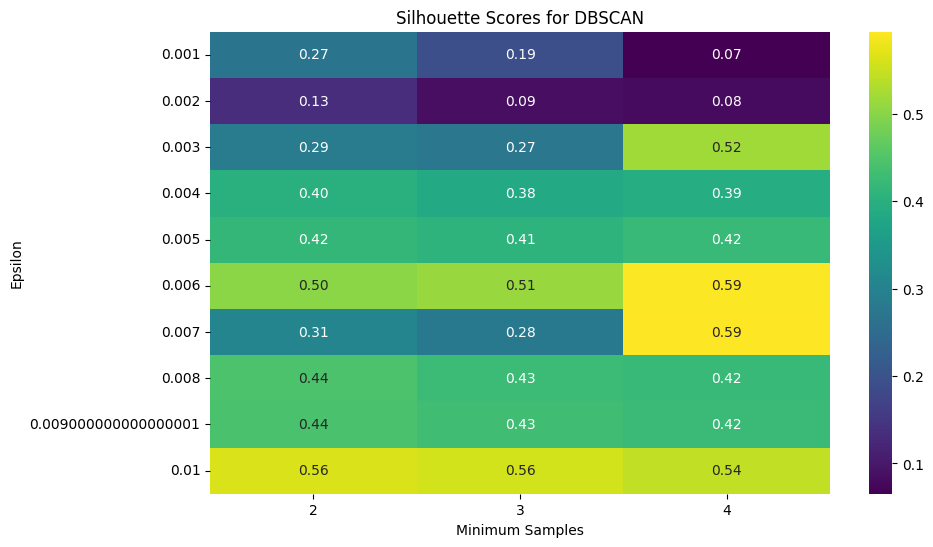

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

silhouette_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(restaurants_cleaned[['latitude', 'longitude']])
        if len(np.unique(cluster_labels)) > 1:  # Ensure there's more than one cluster
            silhouette_avg = silhouette_score(restaurants_cleaned[['latitude', 'longitude']], cluster_labels)
            silhouette_scores.append([eps, min_samples, silhouette_avg])

silhouette_df = pd.DataFrame(silhouette_scores, columns=['Epsilon', 'Min Samples', 'Silhouette Score'])


plt.figure(figsize=(10, 6))
heatmap_data = silhouette_df.pivot(index='Epsilon', columns='Min Samples', values='Silhouette Score')
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f", cbar=True)
plt.title('Silhouette Scores for DBSCAN')
plt.xlabel('Minimum Samples')
plt.ylabel('Epsilon')
plt.show()



##  Visualizing DBSCAN Results on Folium Map


In [30]:
import folium

dbscan = DBSCAN(eps=optimal_eps, min_samples=optimal_min_samples)
cluster_labels = dbscan.fit_predict(restaurants_cleaned[['latitude', 'longitude']])

restaurants_cleaned['cluster_label_dbscan'] = cluster_labels

map_center = [restaurants_cleaned['latitude'].mean(), restaurants_cleaned['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

for index, row in restaurants_cleaned.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color=f'#{row["cluster_label_dbscan"]+1}0',
                        fill=True,
                        fill_color=f'#{row["cluster_label_dbscan"]+1}0',
                        fill_opacity=0.7).add_to(mymap)

mymap.save('dbscan_map.html')
mymap


##  Perform Hierarchical clustering

In [31]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5  
linkage = 'ward'  

hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)

cluster_labels = hierarchical_clustering.fit_predict(restaurants_cleaned[['latitude', 'longitude']])



## Visualizing Hierarchical Clustering Results on Folium Map


In [32]:
import folium


restaurants_cleaned['cluster_label_hierarchical'] = cluster_labels

map_center = [restaurants_cleaned['latitude'].mean(), restaurants_cleaned['longitude'].mean()]
mymap = folium.Map(location=map_center, zoom_start=12)

for index, row in restaurants_cleaned.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']],
                        radius=5,
                        color=f'#{row["cluster_label_hierarchical"]+1}0',
                        fill=True,
                        fill_color=f'#{row["cluster_label_hierarchical"]+1}0',
                        fill_opacity=0.7).add_to(mymap)

mymap.save('hierarchical_map.html')
mymap
